In [2]:
import pandas as pd;
import seaborn as sb;
import matplotlib.pyplot as plt
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

from keras.layers import Dense, Flatten, Conv2D
from keras import Model

TensorFlow version: 2.9.1


In [3]:
df = pd.read_csv('CrimeDataset.csv')
df_top = df.head()
df

#Check the data types of the columns




,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Daily Clery Crime Log,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,"Friday, October 7th, 2022",NaN,NaN
1,Incident,Date reported,Time reported,Date occurred,Time occurred,General Location,Crime Description,Disposition
2,CSA22-107,8/8/2022,16:27,6/2/2022,UNKNOWN,ON CAMPUS,FONDLING,ADMIN CLOSED
3,II2208634,8/8/2022,21:40,8/8/2022,21:40,SECOND ST S / GREEN ST E,DRIVING UNDER SUSPENDED LICENSE,ARREST
4,UU2214306,8/8/2022,7:08,8/7/2022,13:40,"803 W GREEN ST #4, URBANA",DRUG ACTIVITY,REPORTED TO OTHER AGENCY
...,...,...,...,...,...,...,...,...
841,CC2234885,10/7/2022,7:17,10/6/2022,21:16,"510 E CLARK ST, CHAMPAIGN",THEFT,REPORTED TO OTHER AGENCY
842,II2211768,10/7/2022,3:54,10/5/2022,17:11,200 blk of JOHN E,ASSIST OTHER POLICE DEPT,ADMIN. CLOSE
843,II2211768,10/7/2022,3:54,10/5/2022,17:11,200 blk of JOHN E,THEFT $500 AND UNDER,PENDING
844,IF2211038,09/24/22022,0:31,9/24/2022,0:31,CARR RESIDENCE HALL,LIQUOR-UNDERAGE,STUDENT DISC REFERRAL


In [4]:
# Rename the columns and rempve the row w duplicate col names
# Removed copy=false as an argument because compiler reported it as an issue, don't know if it was needed
df = df.set_axis(['Incident','Date Reported', 'Time Reported', 'Date occurred', 'Time occurred', 'General Location', 'Crime Description', 'Disposition'], axis = 1)
df = df.drop(index = [0,1])
df


,Incident,Date Reported,Time Reported,Date occurred,Time occurred,General Location,Crime Description,Disposition
2,CSA22-107,8/8/2022,16:27,6/2/2022,UNKNOWN,ON CAMPUS,FONDLING,ADMIN CLOSED
3,II2208634,8/8/2022,21:40,8/8/2022,21:40,SECOND ST S / GREEN ST E,DRIVING UNDER SUSPENDED LICENSE,ARREST
4,UU2214306,8/8/2022,7:08,8/7/2022,13:40,"803 W GREEN ST #4, URBANA",DRUG ACTIVITY,REPORTED TO OTHER AGENCY
5,UU2214324,8/8/2022,7:08,8/7/2022,17:53,"606 STOUGHTON ST, URBANA",THEFT,REPORTED TO OTHER AGENCY
6,CC2226753,8/9/2022,7:00,8/9/2022,2:17,"708 S SIXTH ST, CHAMPAIGN",THEFT,REPORTED TO OTHER AGENCY
...,...,...,...,...,...,...,...,...
841,CC2234885,10/7/2022,7:17,10/6/2022,21:16,"510 E CLARK ST, CHAMPAIGN",THEFT,REPORTED TO OTHER AGENCY
842,II2211768,10/7/2022,3:54,10/5/2022,17:11,200 blk of JOHN E,ASSIST OTHER POLICE DEPT,ADMIN. CLOSE
843,II2211768,10/7/2022,3:54,10/5/2022,17:11,200 blk of JOHN E,THEFT $500 AND UNDER,PENDING
844,IF2211038,09/24/22022,0:31,9/24/2022,0:31,CARR RESIDENCE HALL,LIQUOR-UNDERAGE,STUDENT DISC REFERRAL


<AxesSubplot:>

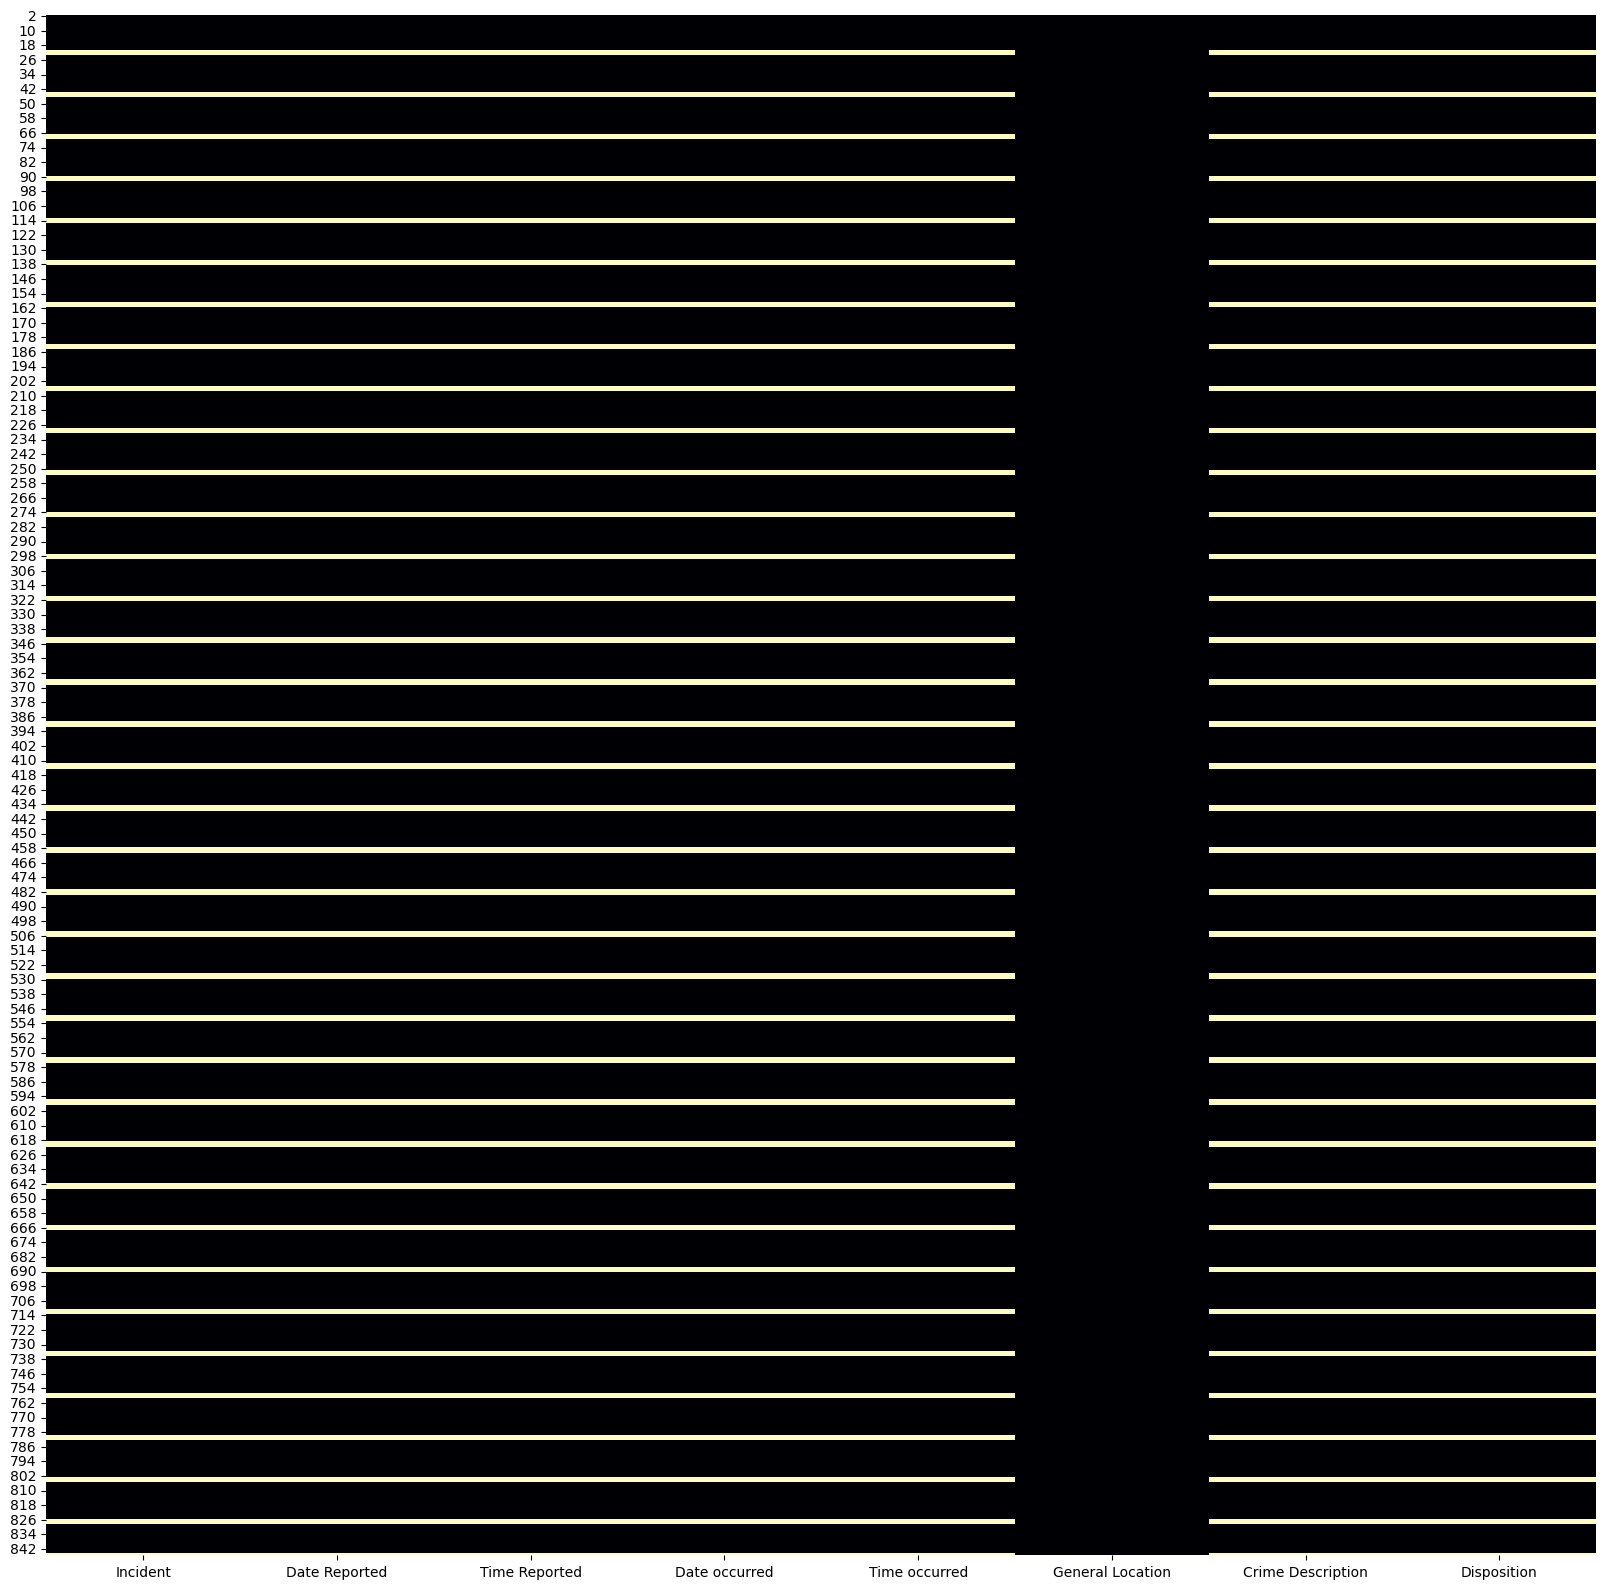

In [5]:
#Generated heat map to check for null values but data set might be too large
plt.figure(figsize=(20,20))
sb.heatmap(df.isnull(), cbar = False, cmap='magma')

In [6]:
# Shows that we have null values in our dataset which we need to clean
null_values = df.isnull().sum()
null_values

Incident             109
Date Reported        109
Time Reported        109
Date occurred        109
Time occurred        109
General Location       0
Crime Description    109
Disposition          109
dtype: int64

In [7]:
print (df.shape)
row = df.shape[0]
col = df.shape[1]

#for i in range(row):

    #for j in range(col):
        #if (j == "Date Reported"):
#Null values are gone, every row that had at least one was dropped
df = df.dropna()
print(df.shape)

(844, 8)
(735, 8)


In [8]:
#Data set looks clear but there needs to be changes to use it in tensorflow. Right now we just have
#objects in our columns but we need numbers so the ML model can assign weights to the DeepLayers. Need to discuss this
df

,Incident,Date Reported,Time Reported,Date occurred,Time occurred,General Location,Crime Description,Disposition
2,CSA22-107,8/8/2022,16:27,6/2/2022,UNKNOWN,ON CAMPUS,FONDLING,ADMIN CLOSED
3,II2208634,8/8/2022,21:40,8/8/2022,21:40,SECOND ST S / GREEN ST E,DRIVING UNDER SUSPENDED LICENSE,ARREST
4,UU2214306,8/8/2022,7:08,8/7/2022,13:40,"803 W GREEN ST #4, URBANA",DRUG ACTIVITY,REPORTED TO OTHER AGENCY
5,UU2214324,8/8/2022,7:08,8/7/2022,17:53,"606 STOUGHTON ST, URBANA",THEFT,REPORTED TO OTHER AGENCY
6,CC2226753,8/9/2022,7:00,8/9/2022,2:17,"708 S SIXTH ST, CHAMPAIGN",THEFT,REPORTED TO OTHER AGENCY
...,...,...,...,...,...,...,...,...
840,II2211752,10/6/2022,10:35,10/5/2022,14:30,PARKING LOT E-14,THEFT $500 AND UNDER,PENDING
841,CC2234885,10/7/2022,7:17,10/6/2022,21:16,"510 E CLARK ST, CHAMPAIGN",THEFT,REPORTED TO OTHER AGENCY
842,II2211768,10/7/2022,3:54,10/5/2022,17:11,200 blk of JOHN E,ASSIST OTHER POLICE DEPT,ADMIN. CLOSE
843,II2211768,10/7/2022,3:54,10/5/2022,17:11,200 blk of JOHN E,THEFT $500 AND UNDER,PENDING
